In [2]:
import json

In [3]:
with open('data_small.json') as f:
    json_obj = json.load(f)

In [14]:
import pandas as pd
df = pd.DataFrame(json_obj['data'])

In [15]:
# def sports_column(x):
#     if x in ['해외축구', '농구/배구', '야구', '스포츠일반', '축구', '해외야구']:
#         return '스포츠'
#     else:
#         return x
# df['category'] = df['category'].apply(sports_column)
mask = df['category'].isin(['사회','경제','세계','IT/과학'])
df = df[mask]

In [16]:
df.drop(['img_url', 'url', 'img'], axis=1, inplace=True)

In [17]:
df.head()

,id,category,text
0,2020010100424,사회,"""조국 부부, 아들 조지워싱턴대 온라인 시험 봐줘 A학점""[SEP]조국 12개 혐의..."
1,2020010100553,세계,"이라크 시위대 美 대사관 습격…트럼프 ""강력 대응할 것""[SEP]성난 이라크 시위대..."
2,2020010100717,사회,"'선거개입 의혹' 송병기 구속영장 기각…법원 ""소명 부족""[SEP]성도현 기자 = ..."
3,2020010100785,경제,"카카오톡 오류…사용자 불만 토로 ""휴대폰 껐다 켰다""[SEP]국민 메신저로 불리는 ..."
4,2020010100828,경제,"트럼프 깜짝 발표…""1월15일 중국과 무역합의 서명""(종합)[SEP]도널드 트럼프 ..."


In [18]:
df['title'] = df['text']
df['content'] = df['text']

df['title'] = df['title'].apply(lambda x: str(x.split('[SEP]')[0]))
df['content'] = df['content'].apply(lambda x: str(x.split('[SEP]')[1]))

df['content_len'] = df['content'].apply(lambda x: len(x.replace('\n','')))
df['paragraph_num'] = df['content'].apply(lambda x: len(x.split('\n\n')))
df['title_len'] = df['title'].apply(lambda x: len(x))
df['date'] = df['id'].apply(lambda x: x[4:8])
df['avg_paragraph'] = df['content'].apply(lambda x: int(len(x) / len(x.split('\n\n'))))

In [19]:
df.drop(['id', 'text'], axis=1, inplace=True)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

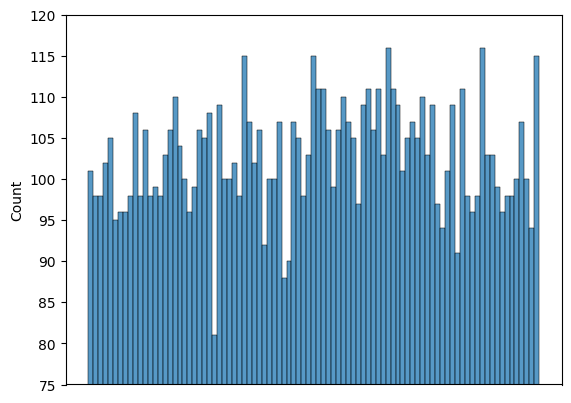

Average number : 102.75
Std : 6.53


In [24]:
# 날짜별로 몇개인지
plt.tick_params(axis='x', bottom=False, top=False, labelbottom=False)
ax = sns.histplot(df['date'])
plt.ylim(75, 120)
plt.show()

df2 = df.groupby(['date']).count()
print(f"Average number : {round(df2['category'].mean(), 2)}") 
print(f"Std : {round(df2['category'].std(), 2)}")

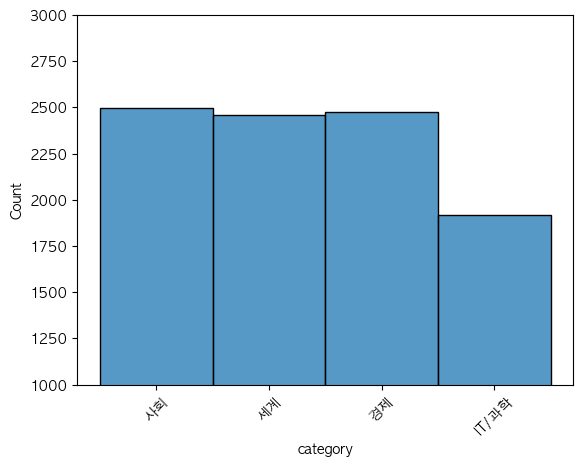

Average number : 2337.5
Std : 281.48


In [25]:
# 날짜별로 몇개인지
# plt.tick_params(axis='x', bottom=False, top=False, labelbottom=False)
plt.rcParams['font.family'] = 'AppleGothic'
_ = sns.histplot(df['category'])
# plt.ylim(160, 200)
plt.xticks(rotation=45)
plt.ylim(1000, 3000)
plt.show()

df2 = df.groupby(['category']).count()
print(f"Average number : {round(df2['title'].mean(), 2)}") 
print(f"Std : {round(df2['title'].std(), 2)}")

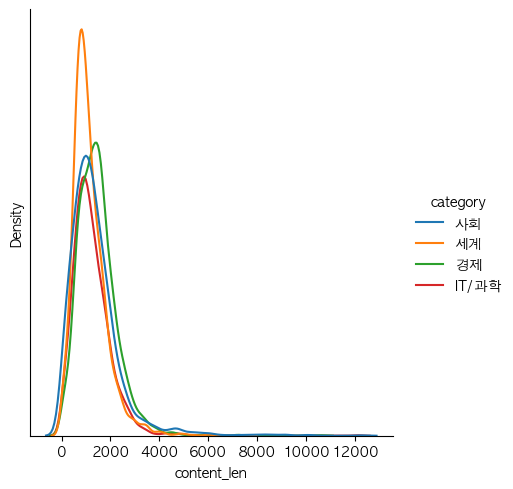

Average length of content : 1303.36
Std : 868.95


In [26]:
ax = sns.displot(df, x='content_len', kind='kde', hue='category')
ax.set(yticks=[])
plt.show()

print(f"Average length of content : {round(df['content_len'].mean(), 2)}")
print(f"Std : {round(df['content_len'].std(), 2)}")

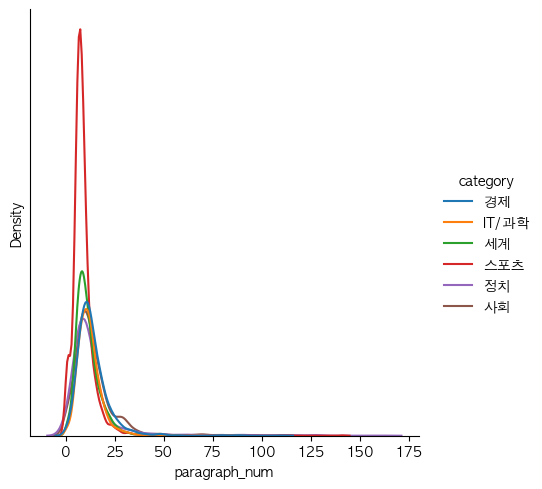

Average number of paragraph : 11.88
Std : 9.56


In [104]:
ax = sns.displot(df, x='paragraph_num', kind='kde', hue='category')
ax.set(yticks=[])
plt.show()
print(f"Average number of paragraph : {round(df['paragraph_num'].mean(), 2)}")
print(f"Std : {round(df['paragraph_num'].std(), 2)}")

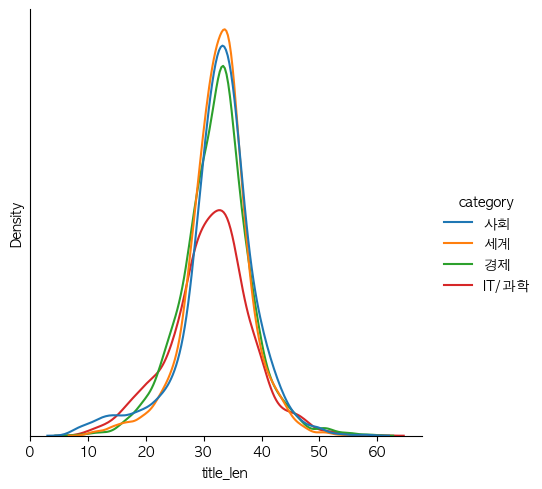

Average length of title : 32.15
Std : 6.16


In [27]:
ax = sns.displot(df, x='title_len', kind='kde', hue='category')
ax.set(yticks=[])
plt.show()
print(f"Average length of title : {round(df['title_len'].mean(), 2)}")
print(f"Std : {round(df['title_len'].std(), 2)}")

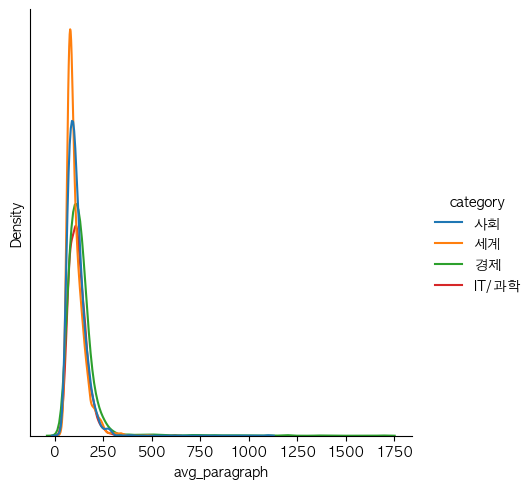

Average length of paragraph : 118.74
Std : 64.51


In [28]:
ax = sns.displot(df, x='avg_paragraph', kind='kde', hue='category')
ax.set(yticks=[])
plt.show()
print(f"Average length of paragraph : {round(df['avg_paragraph'].mean(), 2)}")
print(f"Std : {round(df['avg_paragraph'].std(), 2)}")

In [50]:
cover_5 = int(len(df) * 0.05)
cover_25 = int(len(df) * 0.25)

print('[ Content length ]')
print(df.sort_values(by='content_len', ascending=False, ignore_index=True).loc[[cover_5, cover_25], 'content_len'])
print(f"\nAverage of content_len : {df['content_len'].mean()}\n\n")

print('[ Pragraph number ]')
print(df.sort_values(by='paragraph_num', ascending=False, ignore_index=True).loc[[cover_5, cover_25], 'paragraph_num'])
print(f"\nAverage number of paraagraph : {df['paragraph_num'].mean()}")

[ Content length ]
467     2713
2337    1670
Name: content_len, dtype: int64

Average of content_len : 1303.363743315508


[ Pragraph number ]
467     25
2337    14
Name: paragraph_num, dtype: int64

Average number of paraagraph : 11.818181818181818
